<a href="https://colab.research.google.com/github/lucy-westlake/ppd430/blob/main/group_ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adding spatial data to our projct**
We began with keepin the data importing and cleaning we had done in previous weeks along with some basic analsis of the data.

We then used geopandas in order to work with spacial data, and loaded a spatial dataset of Los Angeles County divided by zip code. We named this dataset zip_shape.

Join two datasets together (either a pandas merge or a geopandas spatial join). Project them to a sensible CRS. Using the mapping techniques we learned in class, visualize interesting aspects of your data. Create at least 3 maps. Each map should be followed by a markdown cell that succinctly explains the map's interpretation, the projection that you chose to use, and what you are visualizing and why it is interesting: tell us its story. This story should be accompanied by any relevant descriptive statistics, as needed, to round out the picture.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install osmnx
import osmnx as ox

In [ ]:
#downloads and installs 3rd party packages we are working with
!curl -s -o pyproject.toml https://raw.githubusercontent.com/gboeing/ppd430/refs/heads/main/pyproject.toml && uv pip install -q -r pyproject.toml

In [ ]:
#importing libraries and data sets: Peyton,Lucy

import pandas as pd # imports the pandas library
import seaborn as sns #imports seaborn library
import matplotlib.pyplot as plt #imports matplot library
import geopandas as gpd #imports the spatial extension of pandas
from google.colab import drive #imports drive module to connect ot google drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing data set for Los Angeles Fire Department Response Metrics: Peyton, Sara, Lucy
lafd_response = pd.read_csv("/content/drive/MyDrive/Senior Fall/PPD 430/group work/LAFD_Response_Metrics_-_Raw_Data_20251002.csv", nrows=5000, engine="python", ) #imports smaller dataset so code doesn't crash

In [ ]:
#importing data set for fire stations
fire_stations = pd.read_csv("/content/drive/MyDrive/Senior Fall/PPD 430/group work/FireStations_20251002.csv", engine="python", dtype={"the_geom": str})

In [ ]:
#importing data set for economic income in LA

income = pd.read_csv("/content/drive/MyDrive/Senior Fall/PPD 430/group work/Los Angeles_CensusZipCodeTabulationArea.csv", engine="python")

In [ ]:
#we will start by data cleaning for lafd_response data
#summary of data before cleaning

lafd_response

,Randomized Incident Number,First In District,Emergency Dispatch Code,Dispatch Sequence,Dispatch Status,Unit Type,PPE Level,Incident Creation Time (GMT),Time of Dispatch (GMT),En Route Time (GMT),On Scene Time (GMT)
0,"201,601,829,370",38,Emergency,4,QTR,E - ENGINE,EMS,23:20:05.000000,23:20:51.143851,23:21:15.251692,23:24:53.648235
1,"201,602,638,559",79,Emergency,4,QTR,E - ENGINE,EMS,14:00:16.000000,14:01:31.037820,14:02:14.363647,NaN
2,"201,604,859,211",93,Emergency,2,QTR,E - ENGINE,EMS,22:11:17.000000,22:12:25.961964,22:13:24.575960,22:16:51.061670
3,"201,602,589,422",2,Emergency,5,QTR,E - ENGINE,EMS,00:59:16.000000,00:59:35.845669,01:00:38.360633,01:02:29.584763
4,"201,601,589,592",33,Emergency,2,QTR,T - TRUCK,EMS,01:31:39.000000,01:32:11.053057,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4995,"201,601,599,579",67,Emergency,1,QTR,T - TRUCK,Non-EMS,02:02:36.000000,02:03:13.082158,02:04:43.664629,02:10:17.034459
4996,"201,601,599,580",9,Emergency,1,RAD,RA - ALS RESCUE AMBULANCE,EMS,03:34:20.000000,03:34:41.847947,03:35:17.781419,03:36:47.918689
4997,"201,601,599,580",9,Emergency,2,RAD,RA - ALS RESCUE AMBULANCE,EMS,03:34:20.000000,03:36:54.356092,NaN,NaN
4998,"201,601,599,581",9,Emergency,1,RAD,RA - ALS RESCUE AMBULANCE,EMS,02:02:58.000000,02:05:15.620781,02:05:39.329695,02:11:40.527952


In [ ]:
#renames column names to be more meaningful
lafd_response = lafd_response.rename(columns={"Randomized Incident Number": "Incident Identification Number", "First In District": "Incendent District Location", "Emergency Dispatch Code": "Emergency Status", "Incident Creation Time (GMT)": "Incident Creation Time", "Time of Dispatch (GMT)": "Time of Dispatch", "On Scene Time (GMT)": "On Scene Time"}) #changes name of column to be more meaningful

In [ ]:
#dropping null values of "On Scene Time" and "Incident Creation Time (GMT)" because these are important variable of interest and we don't want data that doesn't have these values

lafd_response = lafd_response.dropna(subset=["On Scene Time", "Incident Creation Time"])

In [ ]:
#checking types of variables in lafd_response
lafd_response.dtypes

#the type of all variables look to be correctly coordinated to their values

,0
Incident Identification Number,object
Incendent District Location,int64
Emergency Status,object
Dispatch Sequence,int64
Dispatch Status,object
Unit Type,object
PPE Level,object
Incident Creation Time,object
Time of Dispatch,object
En Route Time (GMT),object


In [ ]:
#changing variable that are time variables to datetime format rather than objects

lafd_response["On Scene Time"] = pd.to_datetime(lafd_response["On Scene Time"], errors="coerce")
lafd_response["Time of Dispatch"] = pd.to_datetime(lafd_response["Time of Dispatch"], errors="coerce")
lafd_response["En Route Time (GMT)"] = pd.to_datetime(lafd_response["En Route Time (GMT)"], errors="coerce")
lafd_response["Incident Creation Time"] = pd.to_datetime(lafd_response["Incident Creation Time"], errors="coerce")

/tmp/ipython-input-315961283.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lafd_response["On Scene Time"] = pd.to_datetime(lafd_response["On Scene Time"], errors="coerce")
/tmp/ipython-input-315961283.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lafd_response["Time of Dispatch"] = pd.to_datetime(lafd_response["Time of Dispatch"], errors="coerce")
/tmp/ipython-input-315961283.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lafd_response["En Route Time (GMT)"] = pd.to_datetime(lafd_response["En Route Time (GMT)"], errors="coerce")
/tmp/ipython-input-315961283

In [ ]:
#re-checking updated types of variables for lafd_response
lafd_response.dtypes

,0
Incident Identification Number,object
Incendent District Location,int64
Emergency Status,object
Dispatch Sequence,int64
Dispatch Status,object
Unit Type,object
PPE Level,object
Incident Creation Time,datetime64[ns]
Time of Dispatch,datetime64[ns]
En Route Time (GMT),datetime64[ns]


In [ ]:
#creates new variable for response time in minutes because this variable accounts for total response time from the time the call comes in until the time the emergency vehicle is on site
#there is currently no variable that captures this total time

lafd_response["Response Time (Minutes)"] = ((lafd_response["On Scene Time"] - lafd_response["Incident Creation Time"]).dt.total_seconds() / 60) # creates a new column "response_time_min" subtracting the "On Scene Time (GMT)" from "Incident Creation Time (GMT)" in minutes

lafd_response = lafd_response[lafd_response["Response Time (Minutes)"] >= 0] # keeps rows >= 0 minutes
                                                                             #response times that are less than 0 minutes are essentially null values that we don't want in our statistics because it is impossible to have a negative response time

#describes summary stats of response time in minutes
lafd_response["Response Time (Minutes)"].describe() # shows summary statistics

,Response Time (Minutes)
count,4242.000000
mean,7.472103
std,4.356200
min,0.117319
25%,5.031128
50%,6.451172
75%,8.418931
max,59.155700


In [ ]:
#drops "En Route Time" and replaces it with "Response Time" which captures total response time including the time it took calling in
new_col = lafd_response["Response Time (Minutes)"]

lafd_response = lafd_response.drop(columns=["En Route Time (GMT)"])


In [ ]:
#dropping uncessisary variables that aren't meaningful for our question about response time's relation to median household income of tract

lafd_response = lafd_response.drop(columns=["Dispatch Sequence", "Dispatch Status"]) #drops the number of veichles dispatched per emergency

In [ ]:
#changes row labels to the randomized incedent number rather than 0,1,2..., which is more meaningful

lafd_response = lafd_response.set_index("Incident Identification Number")
lafd_response.index.is_unique #checks to see if there are any duplicates of the index


False

In [ ]:
#we must drop duplicates of the same incident identification number because identification number is meant to be unique, so dublicates could mean errors in processing or the same call logged twice
#once we drop, we can use "Incident Identification Number" as our row labels because they are unique

duplicates = lafd_response[lafd_response.duplicated(keep=False)]
lafd_response.shape #checks how many values were dropped - we still have plenty of data

(4242, 8)

In [ ]:
#two columns were duplicated, so drops any dublicated columns

lafd_response = lafd_response.loc[:, ~lafd_response.columns.duplicated()]

In [ ]:
#rename incendent district location to "FS_CD"
lafd_response = lafd_response.rename(columns={"Incendent District Location": "FS_CD"})

In [ ]:
#outputs the values in lafd_response

lafd_response

,FS_CD,Emergency Status,Unit Type,PPE Level,Incident Creation Time,Time of Dispatch,On Scene Time,Response Time (Minutes)
Incident Identification Number,,,,,,,,
"201,601,829,370",38,Emergency,E - ENGINE,EMS,2025-10-16 23:20:05,2025-10-16 23:20:51.143851,2025-10-16 23:24:53.648235,4.810804
"201,604,859,211",93,Emergency,E - ENGINE,EMS,2025-10-16 22:11:17,2025-10-16 22:12:25.961964,2025-10-16 22:16:51.061670,5.567694
"201,602,589,422",2,Emergency,E - ENGINE,EMS,2025-10-16 00:59:16,2025-10-16 00:59:35.845669,2025-10-16 01:02:29.584763,3.226413
"201,601,598,643",16,Emergency,E - ENGINE,EMS,2025-10-16 16:06:41,2025-10-16 16:06:54.654839,2025-10-16 16:07:07.801362,0.446689
"201,601,588,315",103,Emergency,E - ENGINE,EMS,2025-10-16 08:02:33,2025-10-16 08:03:14.942159,2025-10-16 08:09:37.614131,7.076902
...,...,...,...,...,...,...,...,...
"201,601,599,577",106,Emergency,RA - ALS RESCUE AMBULANCE,EMS,2025-10-16 02:47:12,2025-10-16 02:47:14.407387,2025-10-16 02:54:33.039093,7.350652
"201,601,599,579",67,Emergency,T - TRUCK,Non-EMS,2025-10-16 02:02:36,2025-10-16 02:03:13.082158,2025-10-16 02:10:17.034459,7.683908
"201,601,599,580",9,Emergency,RA - ALS RESCUE AMBULANCE,EMS,2025-10-16 03:34:20,2025-10-16 03:34:41.847947,2025-10-16 03:36:47.918689,2.465311


In [ ]:
#cleaning data for fire_stations data frame
#summary of data frame before cleaning

fire_stations

,the_geom,FS_CD,SHP_ADDR,ADDRESS,ZIP,DEPTNAME,HSENO,PREF_DIR,STNAME,STTYPE,SUFF_DIR,UNITDESC,X_COORD,Y_COORD
0,POINT (-118.30847478565374 34.08375012794097),52,Fire Station 52,4957 MELROSE AVE.,"90,029",FIRE,"4,957",NaN,MELROSE,AVE,NaN,NaN,"6,468,261.23133615","1,853,003.78836346"
1,POINT (-118.28654226892745 34.07708277350275),6,Fire Station 6,326 N. VIRGIL AVE.,"90,004",FIRE,326,N,VIRGIL,AVE,NaN,NaN,"6,474,895.4099969","1,850,557.76471221"
2,POINT (-118.42037285259569 34.04404529506214),92,Fire Station 92,10556 W. PICO BLVD,"90,064",FIRE,"10,556",W,PICO,BLVD,NaN,NaN,"6,434,222.00610764","1,838,657.47355221"
3,POINT (-118.29120647521931 33.968767788084904),57,Fire Station 57,7800 S. VERMONT AVE.,"90,044",FIRE,"7,800",S,VERMONT,AVE,NaN,NaN,"6,473,368.7929714","1,811,143.98888113"
4,POINT (-118.5100228348254 34.192900556972354),100,Fire Station 100,6751 LOUISE AVE,"91,406",FIRE,"6,751",NaN,LOUISE,AVE,NaN,NaN,"6,407,434.92713597","1,892,973.60442105"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,POINT (-118.21377595696214 34.0491756310637),2,Fire Station 2,1962 E CESAR E CHAVEZ AVE,"90,033",FIRE,"1,962",E,CESAR E CHAVEZ,AVE,NaN,NaN,"6,496,909.00015599","1,840,347.0000288"
102,POINT (-118.56967232979086 34.28126792068409),28,Fire Station 28,11641 CORBIN AVE,"91,326",FIRE,"11,641",NaN,CORBIN,AVE,NaN,NaN,"6,389,579.26041956","1,925,228.45526555"
103,POINT (-118.49451884473707 34.21605331343816),114,Air Operation,16617 ARMINTA ST,"91,406",FIRE,"16,617",NaN,ARMINTA,ST,NaN,NaN,"6,412,164.77299123","1,901,375.78217046"
104,POINT (-118.48400983609078 34.2143810811325),90,Fire Station 90,7921 WOODLEY AVE,"91,406",FIRE,"7,921",NaN,WOODLEY,AVE,NaN,NaN,"6,415,338.87917581","1,900,751.76931088"


In [ ]:
#outputs the types of the values in fire_stations
fire_stations.dtypes

,0
the_geom,object
FS_CD,int64
SHP_ADDR,object
ADDRESS,object
ZIP,object
DEPTNAME,object
HSENO,object
PREF_DIR,object
STNAME,object
STTYPE,object


In [ ]:
#dropping uncessary variables

fire_stations = fire_stations.drop(columns=["SHP_ADDR", "ADDRESS", "DEPTNAME", "HSENO", "PREF_DIR", "STNAME", "STTYPE", "SUFF_DIR", "UNITDESC"]) # drops some unecissary columns

In [ ]:
#changes row labels to FS_CD rather than 0,1,2... which is the fire station code for which fire station responded to the incedent

fire_stations = fire_stations.set_index("FS_CD") #changes the row labels from 0,1,2... to the number of the firestation that responded
fire_stations.index.is_unique #checks to see if there are any duplicates of the index


True

In [ ]:
#renames column names to be more meaningful

fire_stations = fire_stations.rename(columns={"the_geom": "Fire Station Location", "ZIP": "Zip"}) #changes name of column to be more meaningful


In [ ]:
#removing the comma from zip codes

fire_stations["Zip"] = fire_stations["Zip"].str.replace(",", "", regex=False)

In [ ]:
#summary of fire_stations dataframe after cleaning

fire_stations

,Fire Station Location,Zip,X_COORD,Y_COORD
FS_CD,,,,
52,POINT (-118.30847478565374 34.08375012794097),90029,"6,468,261.23133615","1,853,003.78836346"
6,POINT (-118.28654226892745 34.07708277350275),90004,"6,474,895.4099969","1,850,557.76471221"
92,POINT (-118.42037285259569 34.04404529506214),90064,"6,434,222.00610764","1,838,657.47355221"
57,POINT (-118.29120647521931 33.968767788084904),90044,"6,473,368.7929714","1,811,143.98888113"
100,POINT (-118.5100228348254 34.192900556972354),91406,"6,407,434.92713597","1,892,973.60442105"
...,...,...,...,...
2,POINT (-118.21377595696214 34.0491756310637),90033,"6,496,909.00015599","1,840,347.0000288"
28,POINT (-118.56967232979086 34.28126792068409),91326,"6,389,579.26041956","1,925,228.45526555"
114,POINT (-118.49451884473707 34.21605331343816),91406,"6,412,164.77299123","1,901,375.78217046"


In [ ]:
#merge fire_response and lafd_response dataframes based on fire station code

fire_merged = pd.merge(left=lafd_response, right=fire_stations, how="inner", left_on="FS_CD", right_on="FS_CD")
fire_merged.head() #shows the first few rows of merged data

,FS_CD,Emergency Status,Unit Type,PPE Level,Incident Creation Time,Time of Dispatch,On Scene Time,Response Time (Minutes),Fire Station Location,Zip,X_COORD,Y_COORD
0,38,Emergency,E - ENGINE,EMS,2025-10-16 23:20:05,2025-10-16 23:20:51.143851,2025-10-16 23:24:53.648235,4.810804,POINT (-118.26169554419245 33.78100737708232),90744,"6,482,138.99984039","1,742,788.99993521"
1,93,Emergency,E - ENGINE,EMS,2025-10-16 22:11:17,2025-10-16 22:12:25.961964,2025-10-16 22:16:51.061670,5.567694,POINT (-118.54883591782553 34.17282039981702),91356,"6,395,657.99990249","1,885,728.00014588"
2,2,Emergency,E - ENGINE,EMS,2025-10-16 00:59:16,2025-10-16 00:59:35.845669,2025-10-16 01:02:29.584763,3.226413,POINT (-118.21377595696214 34.0491756310637),90033,"6,496,909.00015599","1,840,347.0000288"
3,16,Emergency,E - ENGINE,EMS,2025-10-16 16:06:41,2025-10-16 16:06:54.654839,2025-10-16 16:07:07.801362,0.446689,POINT (-118.18058304972818 34.066175918675896),90032,"6,506,975.00003706","1,846,514.00016196"
4,103,Emergency,E - ENGINE,EMS,2025-10-16 08:02:33,2025-10-16 08:03:14.942159,2025-10-16 08:09:37.614131,7.076902,POINT (-118.52838891955325 34.22894682269816),91325,"6,401,950.00011373","1,906,120.00004421"


In [ ]:
#cleaning and visualization of income data frame

income

,placeDcid,placeName,Date:Median_Income_Household,Value:Median_Income_Household,Source:Median_Income_Household
0,zip/90003,90003,2023,54781,https://www.census.gov/programs-surveys/acs/da...
1,zip/90004,90004,2023,62655,https://www.census.gov/programs-surveys/acs/da...
2,zip/90005,90005,2023,52755,https://www.census.gov/programs-surveys/acs/da...
3,zip/90006,90006,2023,49847,https://www.census.gov/programs-surveys/acs/da...
4,zip/90007,90007,2023,36032,https://www.census.gov/programs-surveys/acs/da...
...,...,...,...,...,...
60,zip/91602,91602,2023,97994,https://www.census.gov/programs-surveys/acs/da...
61,zip/91604,91604,2023,141317,https://www.census.gov/programs-surveys/acs/da...
62,zip/91605,91605,2023,64539,https://www.census.gov/programs-surveys/acs/da...
63,zip/91606,91606,2023,66884,https://www.census.gov/programs-surveys/acs/da...


In [ ]:
income.dtypes # outputs the types of the values for income

,0
placeDcid,object
placeName,int64
Date:Median_Income_Household,int64
Value:Median_Income_Household,int64
Source:Median_Income_Household,object


In [ ]:
#dropping unecessary variables

income = income.drop(columns=["placeDcid","Date:Median_Income_Household", "Source:Median_Income_Household"])

In [ ]:
#changing variable names to be meaningful

income = income.rename(columns={"placeName": "Zip", "Value:Median_Income_Household": "Median Household Income"})

In [ ]:
#summary of income variable after cleaning

income

,Zip,Median Household Income
0,90003,54781
1,90004,62655
2,90005,52755
3,90006,49847
4,90007,36032
...,...,...
60,91602,97994
61,91604,141317
62,91605,64539
63,91606,66884


In [ ]:
#changing the data type of Zip Code to a string for fire_merged and income dataframes

fire_merged["Zip"] = fire_merged["Zip"].astype(str)
income["Zip"] = income["Zip"].astype(str)

In [ ]:
#merging the fire_merged and income dataframes on the basis of zip code (represents the zip code a fire station is located in)

fire_merged_income = pd.merge(left=fire_merged, right=income, how="inner", left_on="Zip", right_on="Zip")
fire_merged_income.head() # shows the first few rows of the variable

,FS_CD,Emergency Status,Unit Type,PPE Level,Incident Creation Time,Time of Dispatch,On Scene Time,Response Time (Minutes),Fire Station Location,Zip,X_COORD,Y_COORD,Median Household Income
0,93,Emergency,E - ENGINE,EMS,2025-10-16 22:11:17,2025-10-16 22:12:25.961964,2025-10-16 22:16:51.061670,5.567694,POINT (-118.54883591782553 34.17282039981702),91356,"6,395,657.99990249","1,885,728.00014588",110094
1,2,Emergency,E - ENGINE,EMS,2025-10-16 00:59:16,2025-10-16 00:59:35.845669,2025-10-16 01:02:29.584763,3.226413,POINT (-118.21377595696214 34.0491756310637),90033,"6,496,909.00015599","1,840,347.0000288",56001
2,103,Emergency,E - ENGINE,EMS,2025-10-16 08:02:33,2025-10-16 08:03:14.942159,2025-10-16 08:09:37.614131,7.076902,POINT (-118.52838891955325 34.22894682269816),91325,"6,401,950.00011373","1,906,120.00004421",92602
3,103,Emergency,RA - ALS RESCUE AMBULANCE,EMS,2025-10-16 08:02:33,2025-10-16 08:03:14.949849,2025-10-16 08:09:45.300535,7.205009,POINT (-118.52838891955325 34.22894682269816),91325,"6,401,950.00011373","1,906,120.00004421",92602
4,52,Emergency,E - ENGINE,Non-EMS,2025-10-16 08:01:47,2025-10-16 08:02:43.554314,2025-10-16 08:06:18.187533,4.519792,POINT (-118.30847478565374 34.08375012794097),90029,"6,468,261.23133615","1,853,003.78836346",60793


In [ ]:
#changed the type of y-coordinate from an object to a float by removing commas

fire_merged_income["Y_COORD"] = fire_merged_income["Y_COORD"].str.replace(",", "", regex=False)
fire_merged_income["Y_COORD"] = fire_merged_income["Y_COORD"].astype(float)

fire_merged_income["X_COORD"] = fire_merged_income["X_COORD"].str.replace(",", "", regex=False)
fire_merged_income["X_COORD"] = fire_merged_income["X_COORD"].astype(float)

In [ ]:
fire_merged_income.dtypes # looks at type of data

,0
FS_CD,int64
Emergency Status,object
Unit Type,object
PPE Level,object
Incident Creation Time,datetime64[ns]
Time of Dispatch,datetime64[ns]
On Scene Time,datetime64[ns]
Response Time (Minutes),float64
Fire Station Location,object
Zip,object


In [ ]:
#checking the first few rows of income

income.head()

,Zip,Median Household Income
0,90003,54781
1,90004,62655
2,90005,52755
3,90006,49847
4,90007,36032


In [ ]:
#groups observations by zipcode in order to look at response times per zipcode as a whole
#calculates the average response time in each zipcode so there is only one response time per zipcode

lafd_response_zip = fire_merged_income.groupby("Zip")["Response Time (Minutes)"].mean()
lafd_response_zip.shape #checks how many rows and columns is in our new grouping

(49,)

In [ ]:
income

,Zip,Median Household Income
0,90003,54781
1,90004,62655
2,90005,52755
3,90006,49847
4,90007,36032
...,...,...
60,91602,97994
61,91604,141317
62,91605,64539
63,91606,66884


In [ ]:
lafd_response_zip

,Response Time (Minutes)
Zip,
90003,7.120478
90004,8.536506
90006,8.627241
90007,7.676481
90010,6.695962
90011,6.091092
90012,7.738533
90014,6.184951
90015,7.542883


In [ ]:
#merges the income dataframe with "Zip" and "Median Household Income" to our newly grouped lafd_response_zip dataframe with "Zip" and "Response Time (Minutes)"
#we are doing this because our two variables of interest is "Median Household Income" and "Response Time (Minutes)", so this is giving us a clean dataframe with just those values

fire_merged_income_2 = pd.merge(left=lafd_response_zip, right=income, how="left", left_on="Zip", right_on="Zip")
fire_merged_income_2.shape # shows the number of rows and columns in the dataframe

(49, 3)

In [ ]:
#sets index label as the zipcode rather than 0,1,2... so it is more meaningful

fire_merged_income_2 = fire_merged_income_2.set_index("Zip")
fire_merged_income_2.index.is_unique  #checks that each index (zipcode) is unique

True

In [ ]:
#outputs the first few rows of fire_merged_income_2 so we can see the dataframe

fire_merged_income_2.head()

,Response Time (Minutes),Median Household Income
Zip,,
90003,7.120478,54781
90004,8.536506,62655
90006,8.627241,49847
90007,7.676481,36032
90010,6.695962,100901


Part II. Spatial Data

In [ ]:
#imports a data frame that will serve as our map: has zipcode as well as the geometry of LA County divided by zipcode

zip_shape = gpd.read_file("/content/drive/MyDrive/Senior Fall/PPD 430/group work/LA_County_ZIP_Codes/LA_County_ZIP_Codes.shp", dtype={"X_COORD": float, "Y_COORD": float},)
zip_shape.head() #outputs the first few rows of zip_shape

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DTYPE
  return ogr_read(


,OBJECTID,ZIPCODE,Shape_Leng,Shape_Area,geometry
0,1,90001,48677.278478,9.556340e+07,"POLYGON ((-13162792.911 4027356.791, -13162787..."
1,2,90002,44972.017035,8.275222e+07,"POLYGON ((-13161782.828 4023567.812, -13161776..."
2,3,90003,63303.481758,1.026431e+08,"POLYGON ((-13167186.389 4025575.377, -13167186..."
3,4,90004,52471.897635,8.395697e+07,"POLYGON ((-13167326.231 4040017.912, -13167342..."
4,5,90005,88978.011128,3.688581e+07,"MULTIPOLYGON (((-13173037.761 4037101.299, -13..."


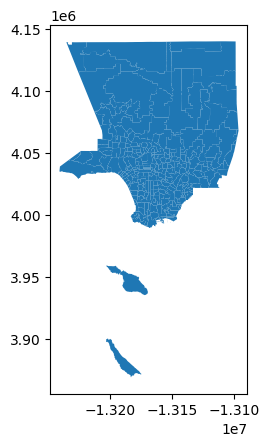

In [ ]:
#outputs a map of zip_shape (LA County divided by zipcode)

ax = zip_shape.plot()

In [ ]:
#creates a new dataframe by merging fire_merged_income_2 (the dataframe with our variables of interest grouped by zipcode) to the zip_shape file

gdf_fire_zip = pd.merge(left=zip_shape, right=fire_merged_income_2, how="right", left_on="ZIPCODE", right_on="Zip")
gdf_fire_zip.head() #outputs the first few rows of zip_shape


,OBJECTID,ZIPCODE,Shape_Leng,Shape_Area,geometry,Response Time (Minutes),Median Household Income
0,3,90003,63303.481758,1.026431e+08,"POLYGON ((-13167186.389 4025575.377, -13167186...",7.120478,54781
1,4,90004,52471.897635,8.395697e+07,"POLYGON ((-13167326.231 4040017.912, -13167342...",8.536506,62655
2,6,90006,37832.454801,5.370366e+07,"POLYGON ((-13167174.352 4034126.501, -13167166...",8.627241,49847
3,7,90007,57886.269976,6.859609e+07,"POLYGON ((-13168312.765 4034263.392, -13168312...",7.676481,36032
4,9,90010,42372.009840,4.555115e+06,"POLYGON ((-13167512.993 4037125.901, -13167483...",6.695962,100901


In [ ]:
#checks the type of our new dataframe

type(gdf_fire_zip)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#creates a variable called count, which is the number of times firestations responded to incendents per zip code

count = fire_merged_income.groupby("Zip")["Response Time (Minutes)"].count()
count #outputs the value stored in count


,Response Time (Minutes)
Zip,
90003,93
90004,64
90006,45
90007,52
90010,51
90011,81
90012,124
90014,152
90015,66


In [ ]:
#checks the shape of our gdf_fire dataframe before adding count
gdf_fire_zip.shape

(49, 7)

In [ ]:
#adds count as a column to the gdf_fire dataframe
#checks the shape of our gdf_fire dataframe after adding count (now we have 1 more column, which is correct)

gdf_fire_zip["Count"] = count.values
gdf_fire_zip.shape

(49, 8)

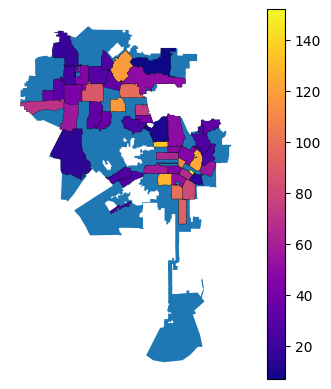

In [ ]:
#Plot 1: Number of Incidents by Zip Code

#creates line outlining each zip code
gdf = ox.projection.project_gdf(ox.geocoder.geocode_to_gdf("Los Angeles, California, USA"), to_crs=gdf_fire_zip.crs)
ax = gdf.plot()

#creates a map from the gdf_fire_zip dataframe color coded by the number of incedents the fire stations in those zip codes responded to
#specifies spcifics of graph color and size
#light blue is null (no data for that zip code) - likily because there are not fire stations in every zipcode
ax = gdf_fire_zip.plot(ax=ax, column="Count", cmap="plasma", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True)
ax.axis("off")
ax.get_figure().savefig("lacity-incidents.png", dpi=300, bbox_inches="tight") #saves the figure

Plot #1 demonstrates the number of incidents by zipcode. The dark blue is the whole LA City area, and there are unreported times; hence, there is no "inferno" color. This graphic shows that fewer incidents tend to be on the west side of LA and the outer parts of the city, while more incidents occur in the southern parts of LA. Generally, the warmer and lighter (yellow and orange) have more incidents (up to 140 reports), while the cool tones (navy and purple) have fewer incidents (around 20 to 40 reports). It is interesting to see how far of a range different zip codes have of needing fire station help, as there are almost 100 reports differences from one neighboring zip code to another.

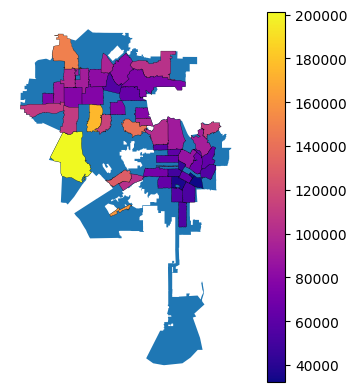

In [ ]:
#Plot 2: Median Household Income by Zip Code

#creates line outlining each zip code
gdf = ox.projection.project_gdf(ox.geocoder.geocode_to_gdf("Los Angeles, California, USA"), to_crs=gdf_fire_zip.crs)
ax = gdf.plot()

#creates a map from the gdf_fire_zip dataframe color coded by the Median household income of each zip code in which there is a fire station
#specifies spcifics of graph color and size
#light blue is null (no data for that zip code) - likily because there are not fire stations in every zipcode
ax = gdf_fire_zip.plot(ax=ax, column="Median Household Income", cmap="plasma", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True)
ax.axis("off")
ax.get_figure().savefig("lacity-income.png", dpi=300, bbox_inches="tight") #saves the figure

Plot #2 demonstrates the LA City area's media household income by zip code. The dark blue is the whole LA City area, and there are unreported times; hence, there is no "plasma" color. This graphic shows that the higher household incomes tend to be on the west side of LA and the outer parts of the city, while the median household income decreases in the southern parts of LA. Generally, the warmer and lighter (yellow and orange) are wealthier (up to 200,000 dollars), while the cool tones (navy and purple) are poorer (down to 40,000 dollars). When comparing to Plot #1, it shows the same trends as the west and outer parts have less Number of incidents in the southern part of LA. This could tell a story or infer that wealthier neighborhoods/zip codes do not have as many incidents or need as much fire station help as the poorer zip codes.

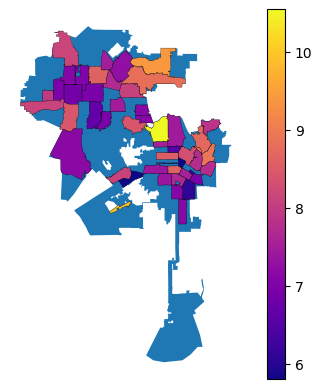

In [ ]:
#Plot 3: Average Response Time by Zip Code
gdf = ox.projection.project_gdf(ox.geocoder.geocode_to_gdf("Los Angeles, California, USA"), to_crs=gdf_fire_zip.crs)
ax = gdf.plot()

#creates a map from the gdf_fire_zip dataframe color coded by the average response time (minutes) of fire stations from that zip code
#specifies spcifics of graph color and size
#light blue is null (no data for that zip code) - likily because there are not fire stations in every zipcode
ax = gdf_fire_zip.plot(ax=ax, column="Response Time (Minutes)", cmap="plasma", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True)
ax.axis("off")
ax.get_figure().savefig("lacity-response-time.png", dpi=300, bbox_inches="tight")

Plot #3 demonstrates the LA City area's average response time by zip code. The dark blue is the whole LA City area, and there are unreported times; hence, there is no "plasma" color. On average, almost all zip codes have a response time of less than 10 minutes. With a range of 6-10 minutes, it is shown that the outer parts and east side of LA tend to take more time, as they show a warmer and lighter color (yellow and orange, taking 9 to 10 minutes). At the same time, the rest is cooler tones (blue and purple, taking 6 to 8 minutes). It would be helpful to gather even more data, but when comparing to Plot #1, it is interesting to note that the number of incidents does not directly line up with the average response time, like how the median household income (Plot #2) correlates with the number of incidents. It does have some telling that where there are fewer incidents, the average response time tends to be slower, and where there are more incidents, the response time can be faster, but it is not always true in every zip code. This is interesting to note for bigger data sets, if there is a sign of correlation.

We used a number of dataframes, geodataframes, shapefiles, and variables to support our analysis:

lafd_response: dataframe containing response metrics for each incident that a LAFD responded to

fire_stations: dataframe containing geographic information about each LAFD station (includuing zip code)

income: dataframe containing ACS estimates of median household income in LA by zip code

fire_merged: dataframe that merges response metrics (lafd_response) and fire station information (fire_stations) on the basis of fire station code

fire_merged_income: dataframe that merges response metrics/fire station information (fire_merge) with income data (income) on the basis of zip code

lafd_response_zip: groups observations (fire_merged_income) by the zip code of the responsible station and produces the mean response time for each zip code

fire_merged_income_2: dataframe that merges mean response time by zip code (lafd_response_zip) with median household income by zip code (income)

zip_shape: shapefile representing the zip codes in LA County

gdf_fire_zip: geodataframe that merges zip code shape file (zip_shape) with response time/income data by zip code (fire_merged_income_2)

count: groups and counts all recorded incidents by zip code using fire_merged_income, when is then added as a column to geodataframe (gdf_fire_zip)

Group members: Lucy, Sara, Peyton, Noah
- We all worked on the group project during class and as a group outside of class for the main chunk of code (merging the data frames, projecting them to CRS, using mapping techniques, and making visualizations)
- added descriptions of each variable and what they did
- left comments
- wrote descriptions of the maps